# <center> PROGRAM 9: TIMESERIES ANALYSIS USING PYTHON </center>

**REQUIREMENTS:**
    
    Mr. António Guterres, the UNO secretary general wants to go through the global analytical report of GDP available in his office. Kindly provide a bird view by implementing various time series models using available data.

## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px

## IMPORTING DATASET AND DISPLAYING IT

In [3]:
data = pd.read_csv ('gdp.csv')
data.head()

Year  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
0  1960         4.13      NaN     39.0     NaN                  NaN   
1  1961         4.45      NaN     46.2     NaN                  NaN   
2  1962         4.88      NaN     19.8     NaN                  NaN   
3  1963         9.17      NaN     24.7     NaN                  NaN   
4  1964         8.89      NaN     25.1     NaN                  NaN   

   Argentina  Armenia  Australia  Austria  ...  United Kingdom  United States  \
0       7.60      NaN       13.0     23.2  ...            20.2           4.97   
1       5.99      NaN       12.4     23.0  ...            19.9           4.90   
2       4.69      NaN       13.9     23.4  ...            19.4           4.81   
3       7.89      NaN       13.0     23.4  ...            19.3           4.87   
4       5.56      NaN       14.9     23.4  ...            18.7           5.10   

   Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  Yemen  Zambia  Zimbabwe  
0     13.8         NaN      NaN       27.1      NaN    NaN     NaN       NaN  
1     14.2         NaN      NaN       28.7      NaN    NaN     NaN       NaN  
2     11.3         NaN      NaN       29.2      NaN    NaN     NaN       NaN  
3     12.0         NaN      NaN       28.9      NaN    NaN     NaN       NaN  
4     11.9         NaN      NaN       26.8      NaN    NaN     NaN       NaN  

[5 rows x 186 columns]

## HANDLING NaN VALUES

In [4]:
data = data.fillna(0)
data.head()

Year  Afghanistan  Albania  Algeria  Angola  Antigua and Barbuda  \
0  1960         4.13      0.0     39.0     0.0                  0.0   
1  1961         4.45      0.0     46.2     0.0                  0.0   
2  1962         4.88      0.0     19.8     0.0                  0.0   
3  1963         9.17      0.0     24.7     0.0                  0.0   
4  1964         8.89      0.0     25.1     0.0                  0.0   

   Argentina  Armenia  Australia  Austria  ...  United Kingdom  United States  \
0       7.60      0.0       13.0     23.2  ...            20.2           4.97   
1       5.99      0.0       12.4     23.0  ...            19.9           4.90   
2       4.69      0.0       13.9     23.4  ...            19.4           4.81   
3       7.89      0.0       13.0     23.4  ...            19.3           4.87   
4       5.56      0.0       14.9     23.4  ...            18.7           5.10   

   Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  Yemen  Zambia  Zimbabwe  
0     13.8         0.0      0.0       27.1      0.0    0.0     0.0       0.0  
1     14.2         0.0      0.0       28.7      0.0    0.0     0.0       0.0  
2     11.3         0.0      0.0       29.2      0.0    0.0     0.0       0.0  
3     12.0         0.0      0.0       28.9      0.0    0.0     0.0       0.0  
4     11.9         0.0      0.0       26.8      0.0    0.0     0.0       0.0  

[5 rows x 186 columns]

### Gross domestic product by country allows you to compare the economies of the world's nations. It measures everything produced by everyone in the country whether they are citizens or foreigners.

In [5]:
df1 = data[40:]
df2 = df1.drop(columns=['Year'])
cm = sns.light_palette("brown", as_cmap=True)
df2.style.background_gradient(cmap=cm)

In [6]:
df3 = df2.describe()
cm = sns.light_palette("grey", as_cmap=True)
df3.style.background_gradient(cmap=cm)

## The International Monetary Fund has measured the GDP of all countries in the world. 

There are three ways to compare GDP between countries. The one you use depends on your purpose and how exchange rates and population would affect it.

## 1. Official Exchange Rate

The IMF uses the most commonly agreed-upon measure, the official exchange rate. The country's government or central bank sets this rate.It tells you how much the bank will give you in exchange for one unit of your country's currency.

## Time Series with top 10 countries by GDP

In [7]:
top10 = ['United States','China','Japan','Germany','United Kingdom', 'France','India','Italy','Brazil','Canada']
df = data
df1 = data
df2 = data

In [8]:
fig = px.line(df, x="Year", y=top10,
              hover_data={"Year": "%Y"},
              title='Time Series with top 10 countries by GDP')
fig.update_xaxes(
    dtick="M1",
    tickformat="Y",
    ticklabelmode="period")
fig.show()

### Comparison within Top 10 countries by GDP

In [9]:
fig = px.line(df, x='Year', y=['United States','China','Japan','Germany','Canada'], 
              title='Comparison within Top 10 countries by GDP')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## 2. Purchasing Power Parity

Purchasing power parity allows you to make more accurate comparisons of the economies of two countries. It compensates for exchange rates changes over time. It also accounts for government manipulation of exchange rates.

## World's 10 Largest Economies Using Purchasing Power Parity

In [10]:
Largest10 = ['China','United States','India','Japan','Germany','Russia','Indonesia','Brazil','United Kingdom']
Last10Year = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

In [22]:
fig = px.line(df, x=df1.index, y=df.columns)
fig.show()

## 3. GDP per Capita

GDP per capita is a good way to compare the economic output of a country as experienced by its residents. It divides a country's economic output by its population. You can use GDP per capita to compare any country with another one.

In [24]:
PerCapita = ['Luxembourg','Switzerland','Macao','Norway','Ireland','Iceland','Qatar','Singapore','United States','Denmark']

In [27]:
fig = px.line(df, x=df.index, y=df.columns, title='Time Series with GDP per Capita')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [14]:
fig = px.scatter(df, x='Year', y=['Russia','Sweden','Spain','Sudan','Syria'], range_x=['2015-12-01', '2016-01-15'],
                 title="Default Display with Gaps")
fig.show()

#### 1.1 Time Varying Space Fixed

Each graph represents a country with different values of countries in x-axis.

In [15]:
from sklearn.linear_model import LinearRegression
def graph_plot(country):
    x=np.arange(1,len(df['Year'])+1)
    y=df[country]
    ts=pd.DataFrame({'Year':x,'GDP':y})
    X=ts[['Year']]
    Y=ts['GDP']
    lin=LinearRegression()
    lin.fit(X,Y)
    predy=lin.predict(X)
    plt.scatter(df['Year'],Y,label="Actual Values")
    plt.plot(df['Year'],predy,label="Trendline")
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title(country)

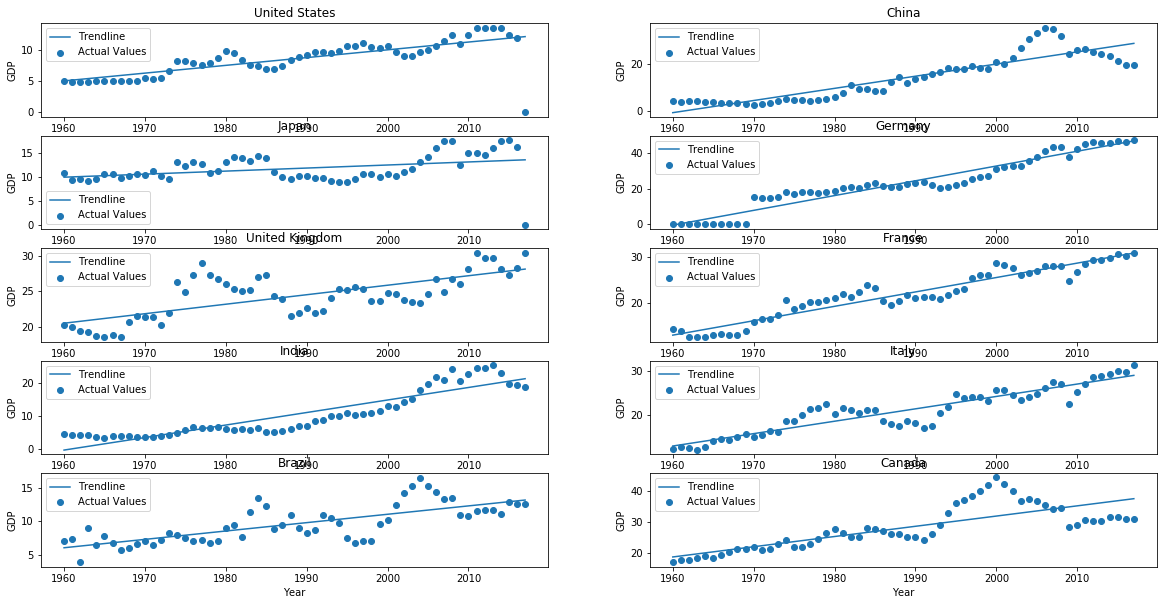

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(5, 2, 1)
graph_plot('United States')
plt.subplot(5, 2, 2)
graph_plot('China')
plt.subplot(5, 2, 3)
graph_plot('Japan')
plt.subplot(5, 2, 4)
graph_plot('Germany')
plt.subplot(5, 2, 5)
graph_plot('United Kingdom')
plt.subplot(5, 2, 6)
graph_plot('France')
plt.subplot(5, 2, 7)
graph_plot('India')
plt.subplot(5, 2, 8)
graph_plot('Italy')
plt.subplot(5, 2, 9)
graph_plot('Brazil')
plt.subplot(5, 2, 10)
graph_plot('Canada')
plt.show()

In [17]:
df1.set_index("Year", inplace = True)

#### 1.2 Time Fixed Space Varying  

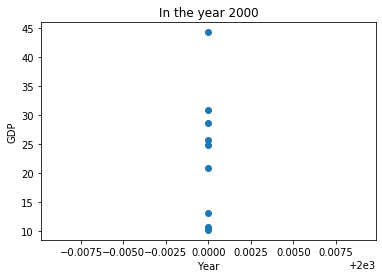

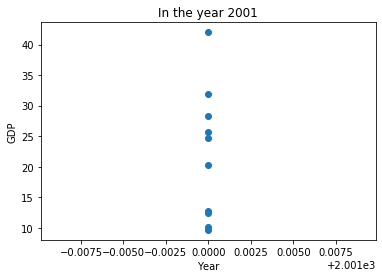

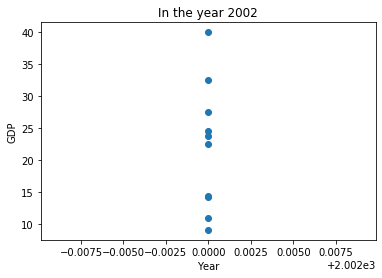

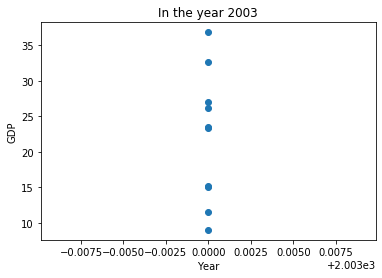

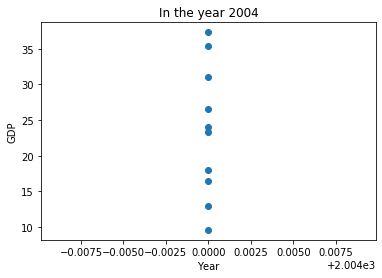

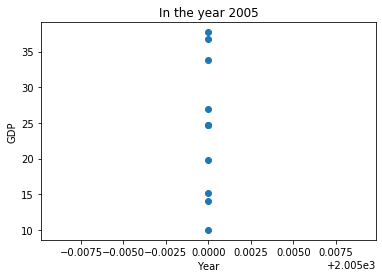

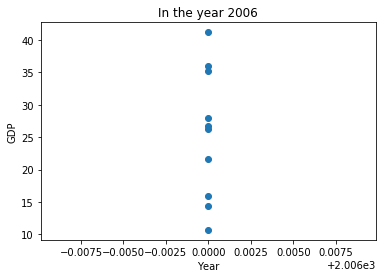

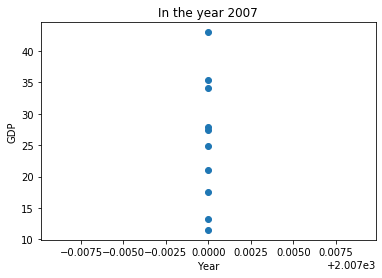

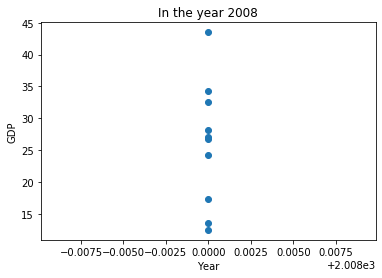

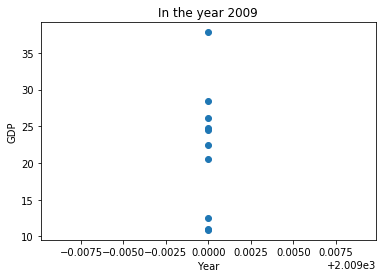

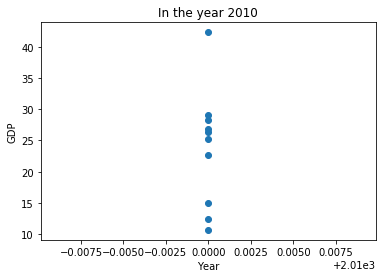

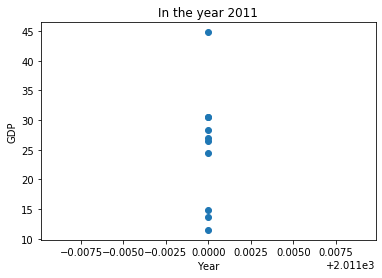

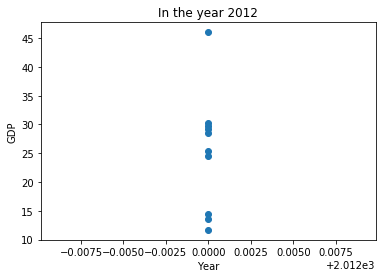

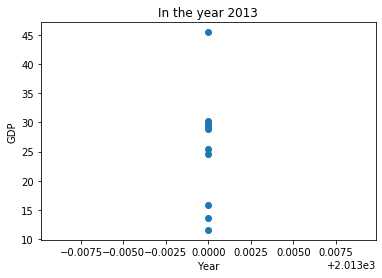

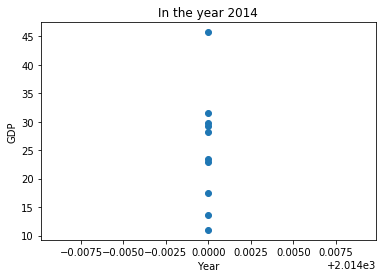

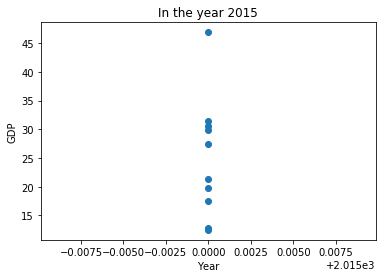

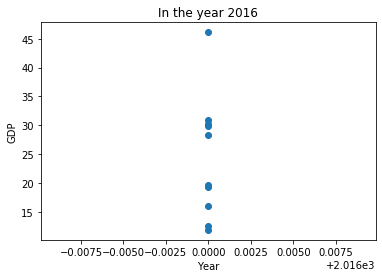

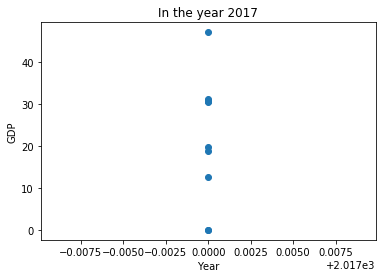

In [18]:
GDP_TVSF=df1.loc[2000:2017,top10]

years=GDP_TVSF.index
years

for year in years:
    y=GDP_TVSF.loc[year]
    x=[year]*10
    plt.scatter(x,y)
    plt.title('In the year '+str(year))
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.show()


#### 1.3 Space Fixed Time Fixed

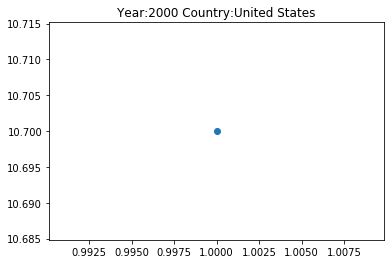

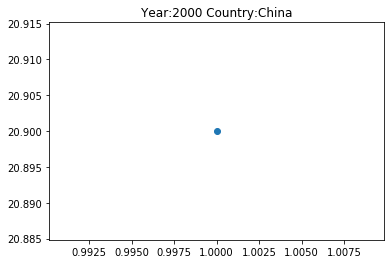

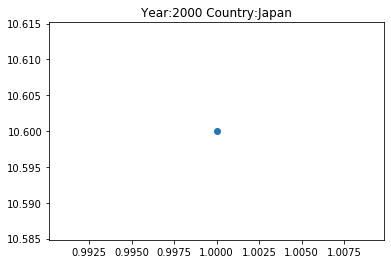

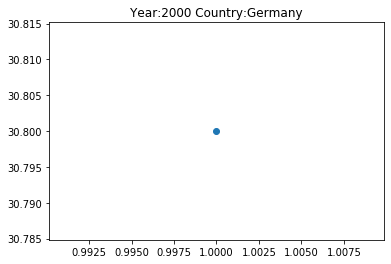

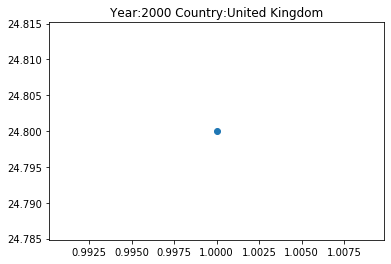

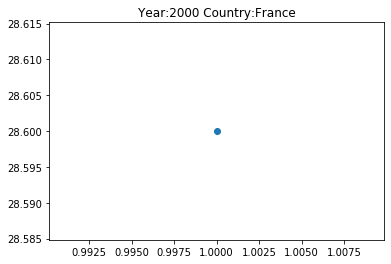

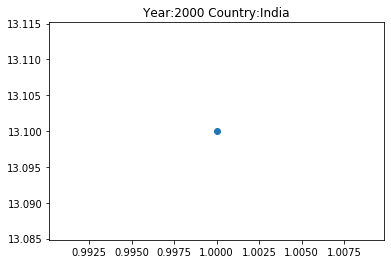

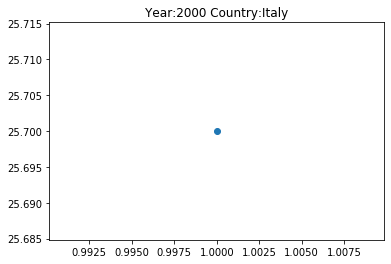

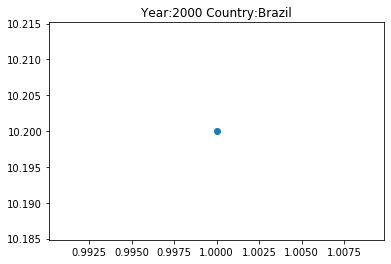

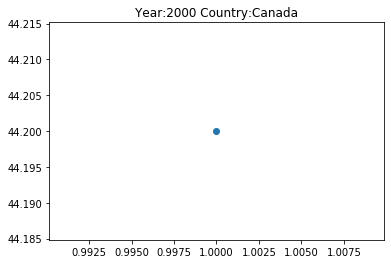

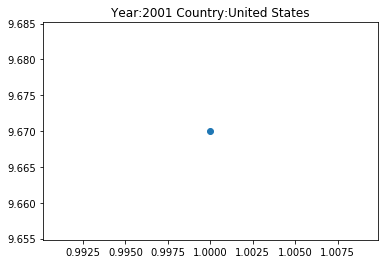

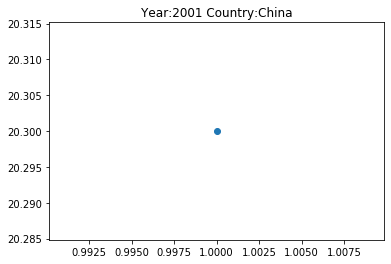

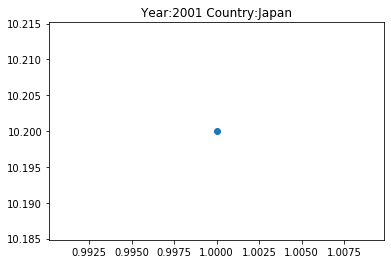

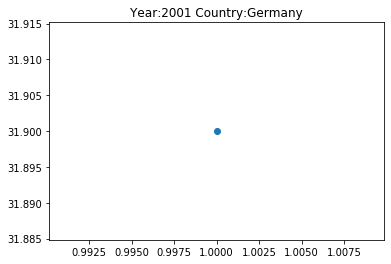

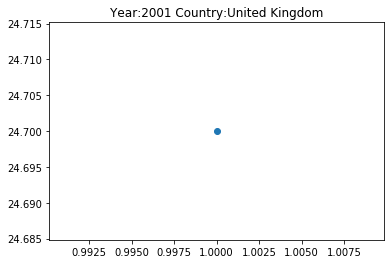

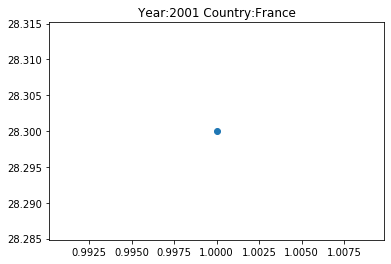

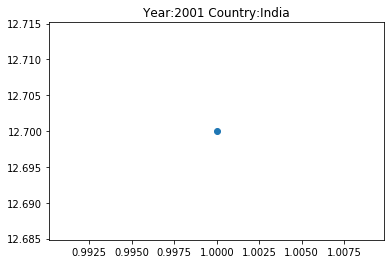

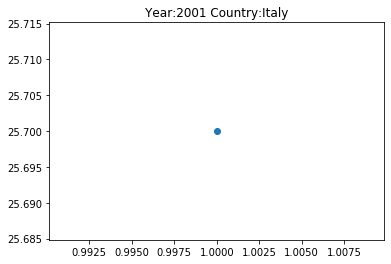

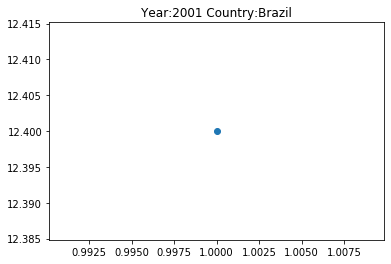

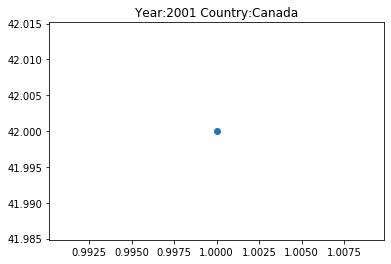

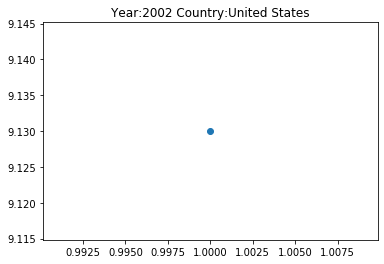

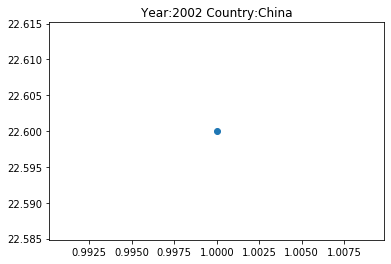

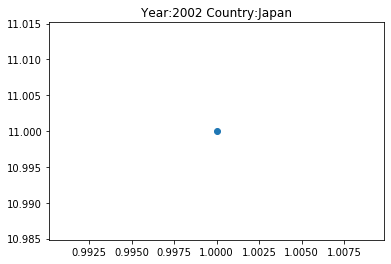

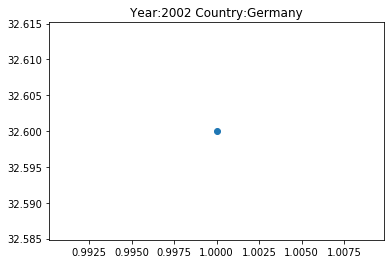

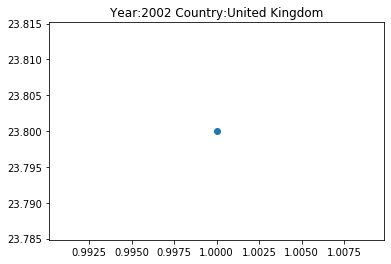

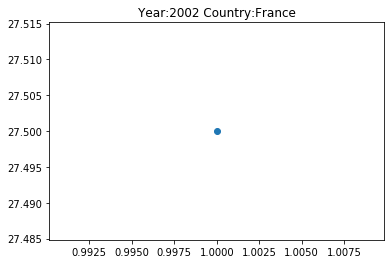

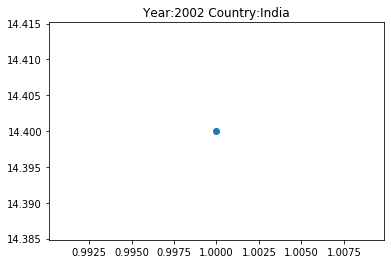

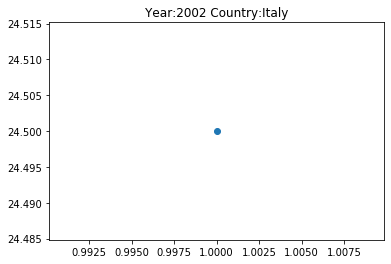

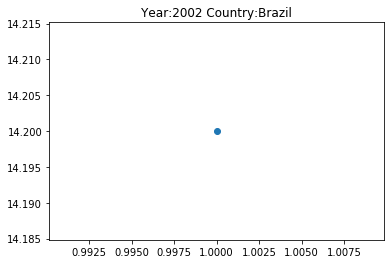

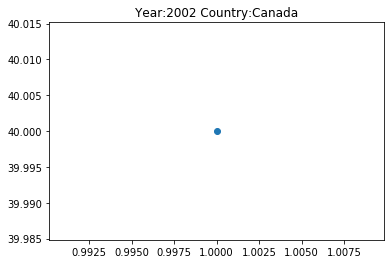

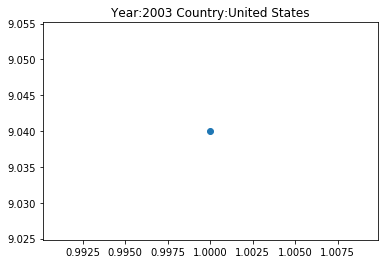

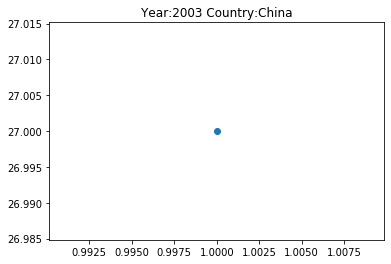

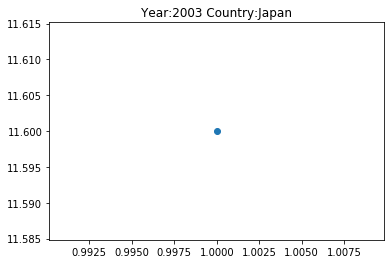

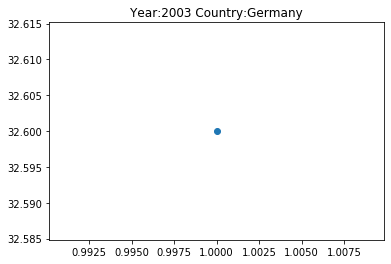

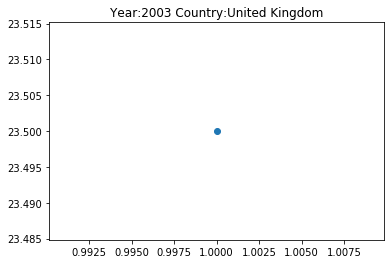

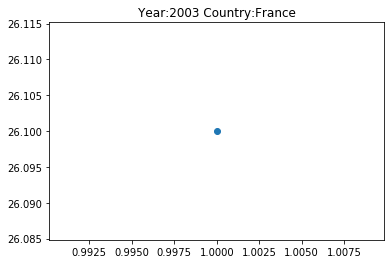

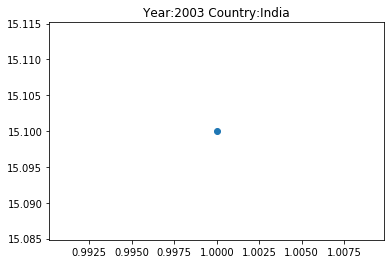

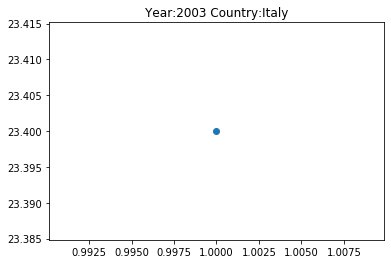

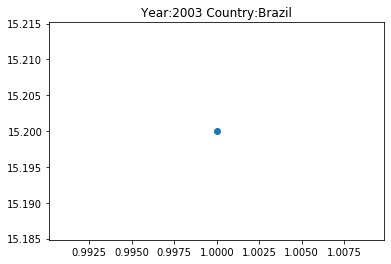

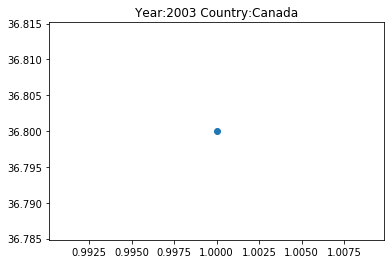

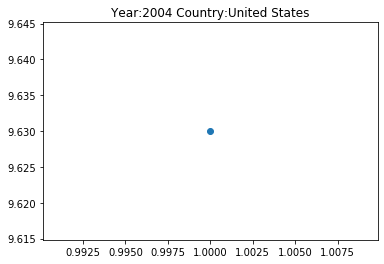

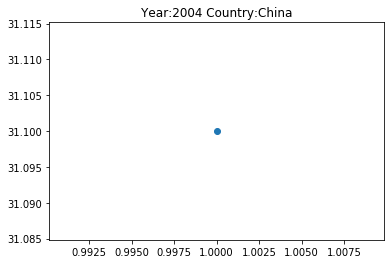

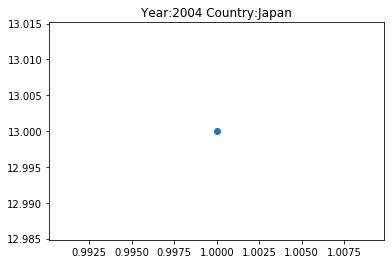

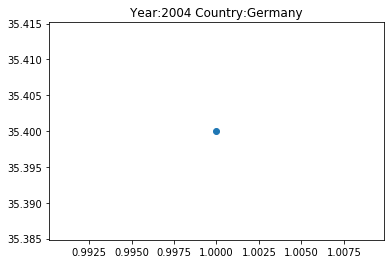

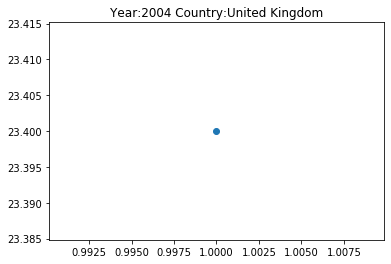

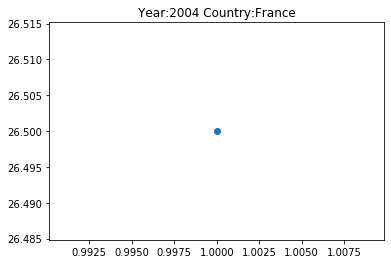

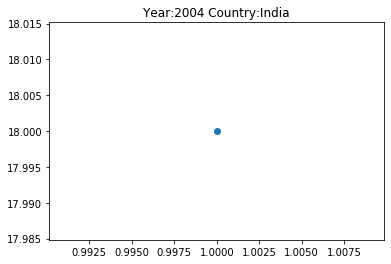

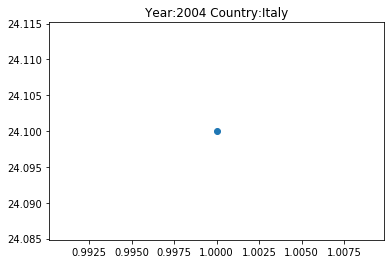

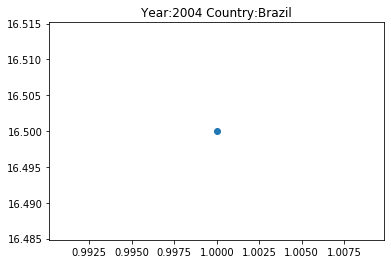

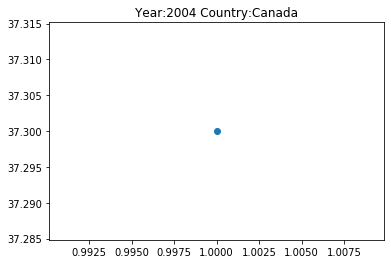

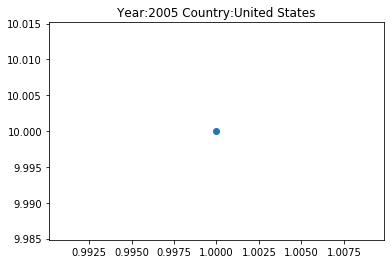

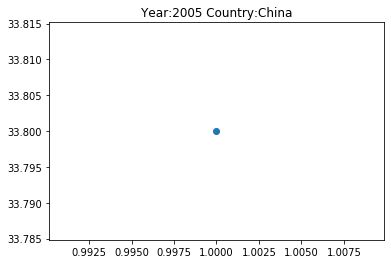

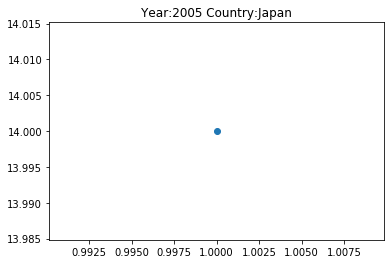

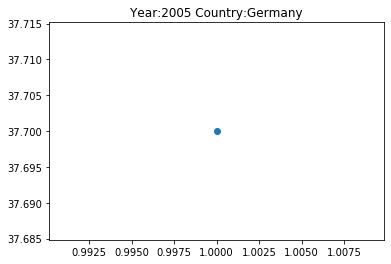

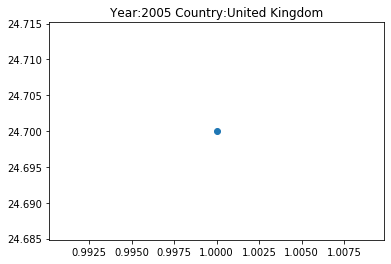

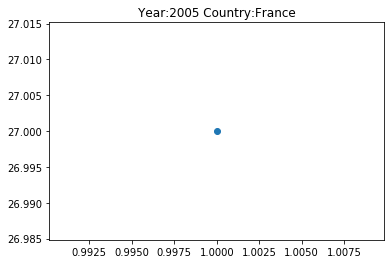

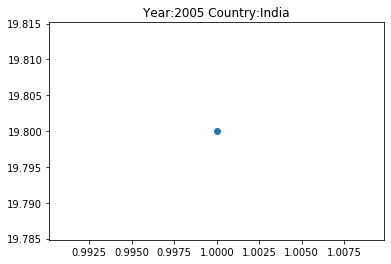

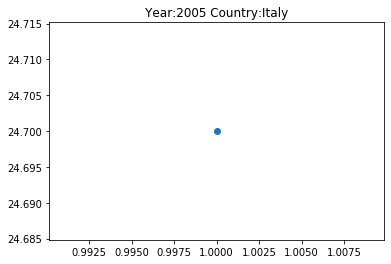

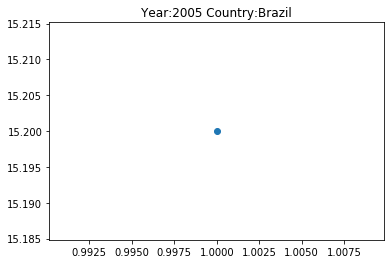

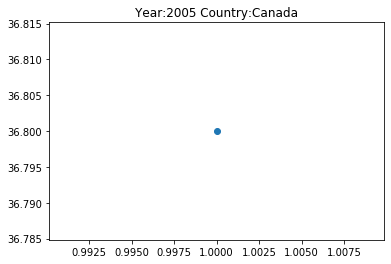

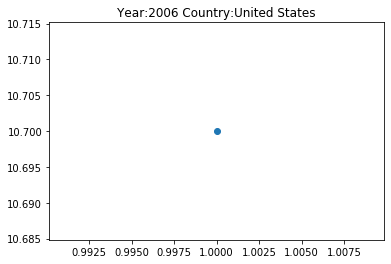

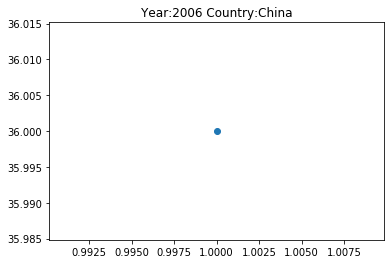

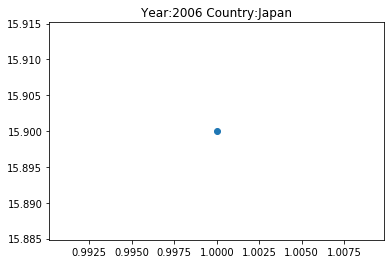

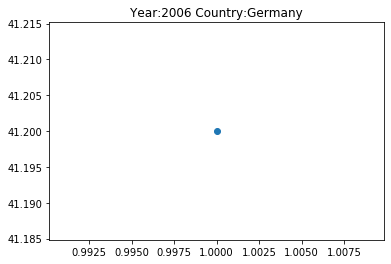

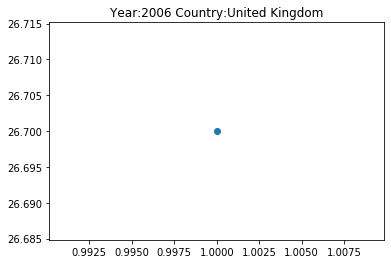

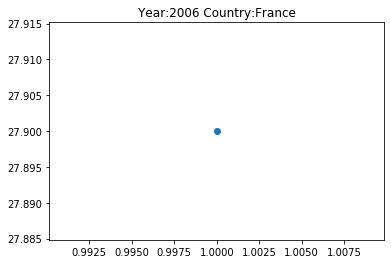

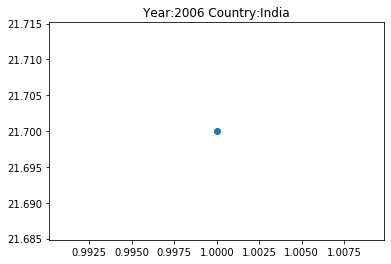

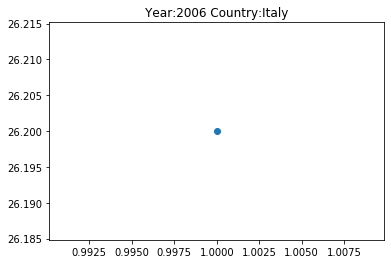

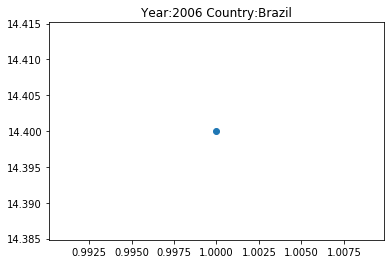

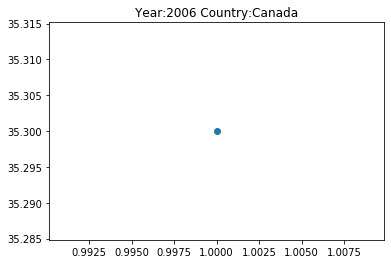

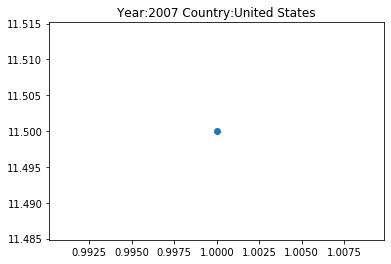

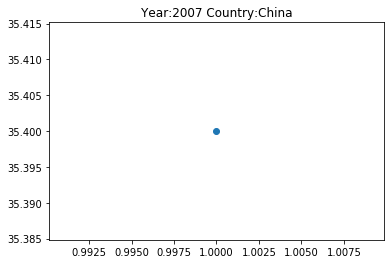

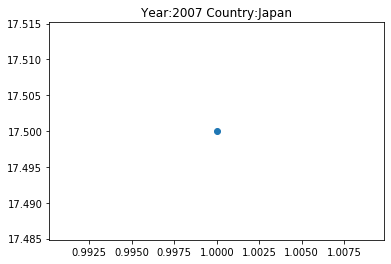

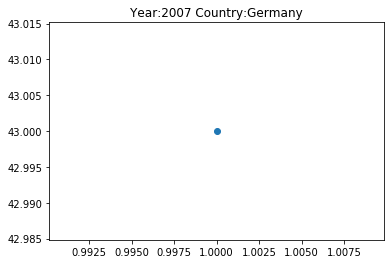

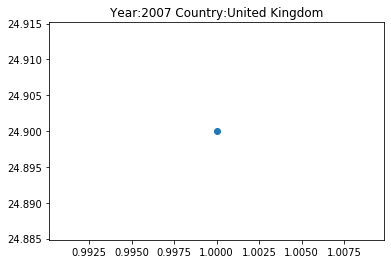

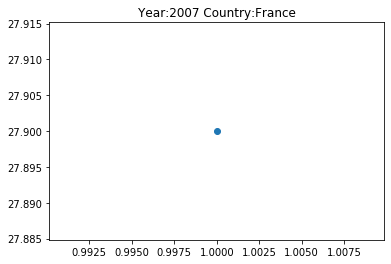

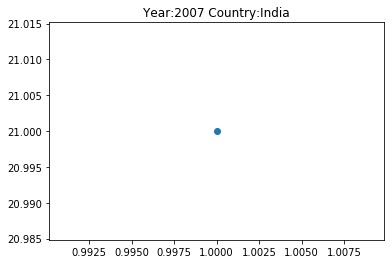

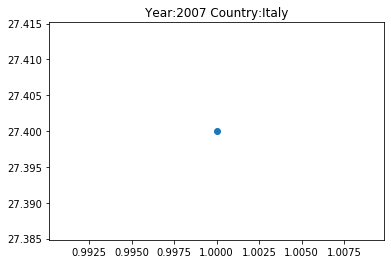

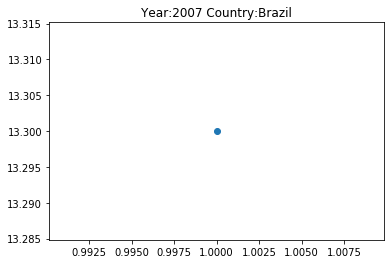

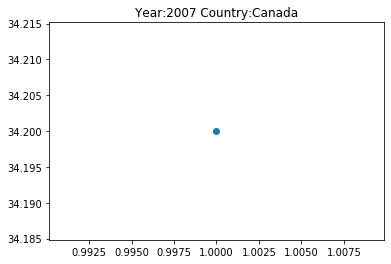

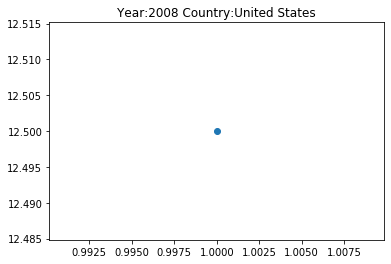

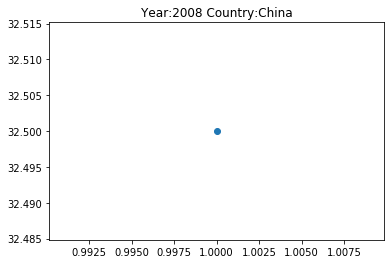

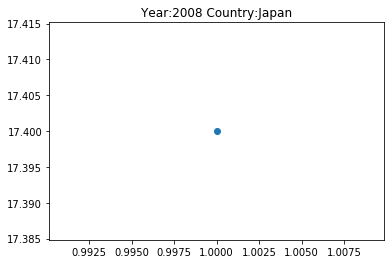

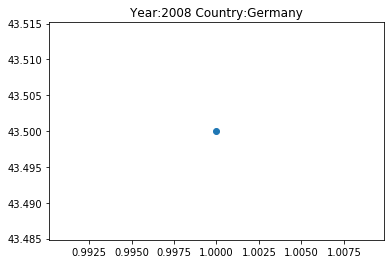

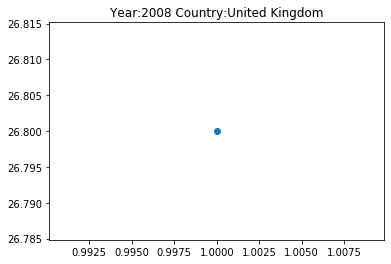

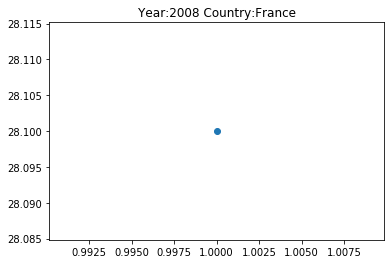

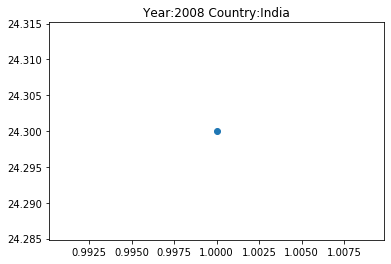

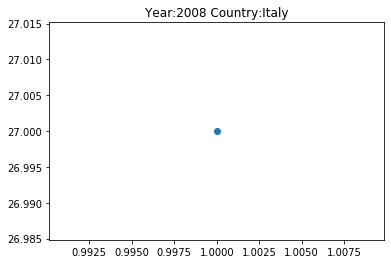

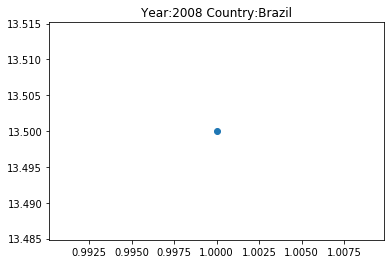

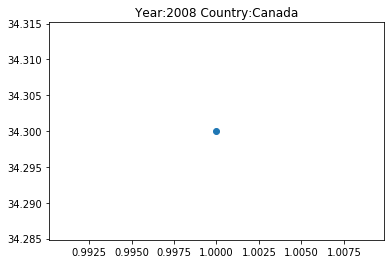

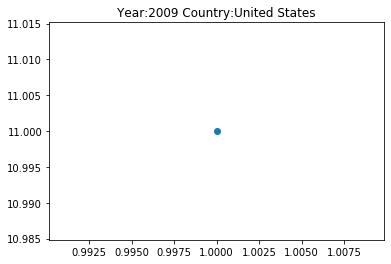

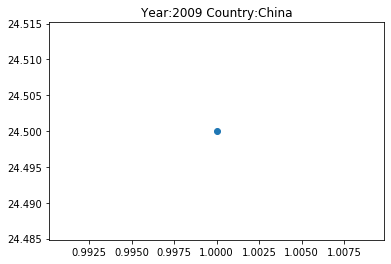

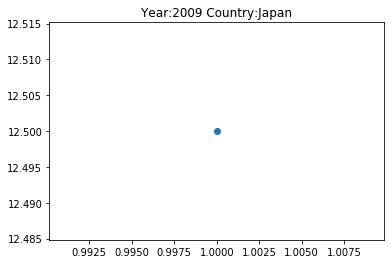

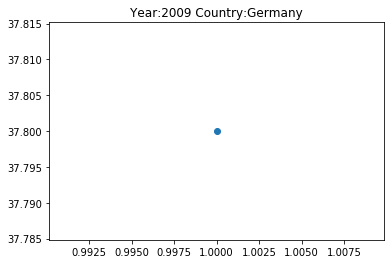

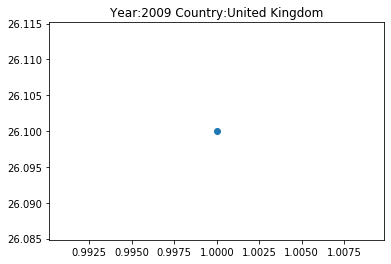

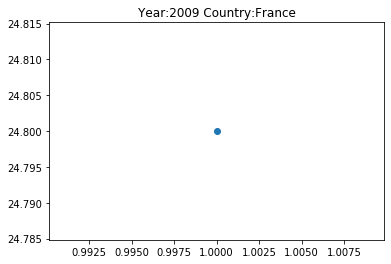

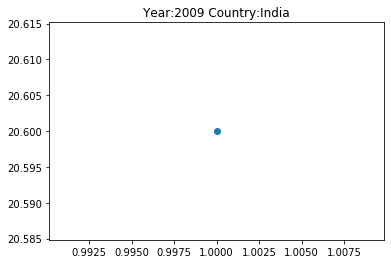

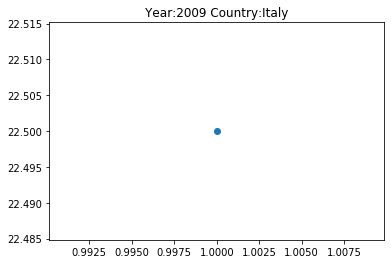

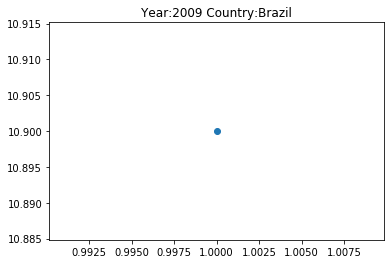

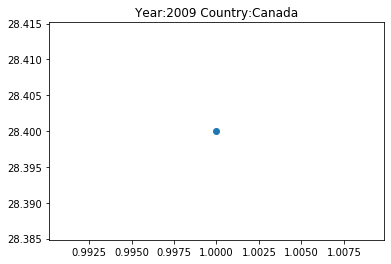

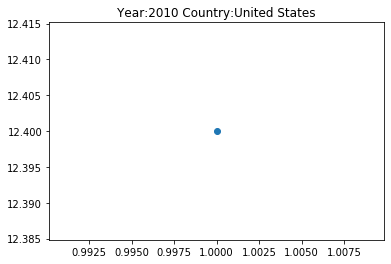

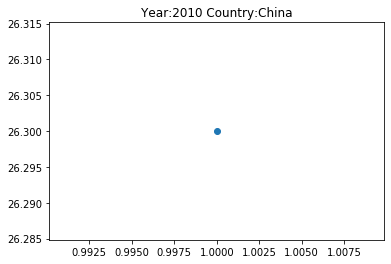

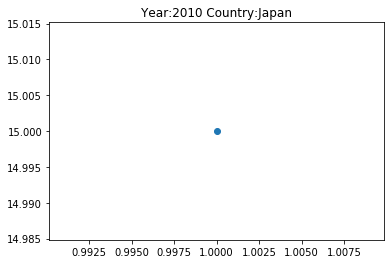

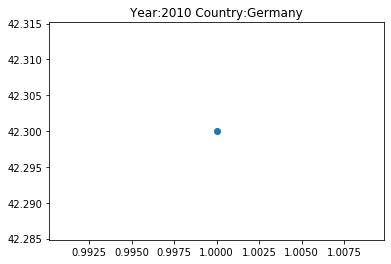

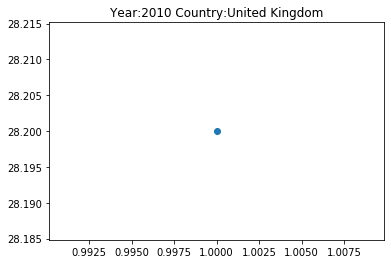

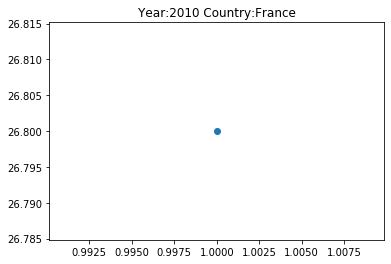

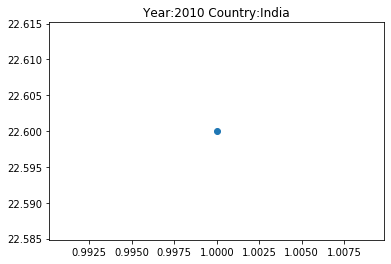

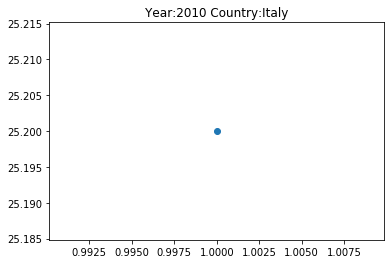

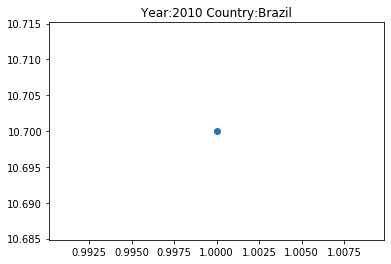

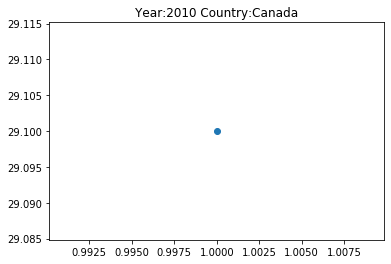

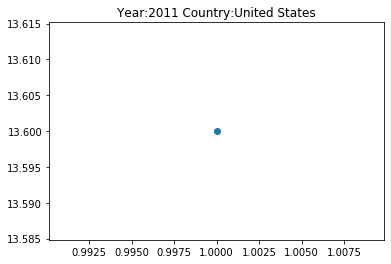

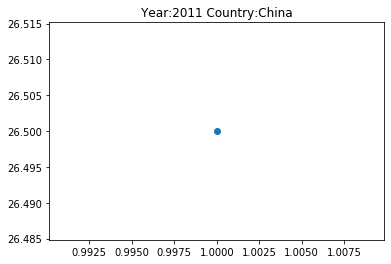

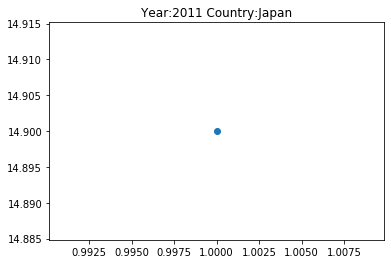

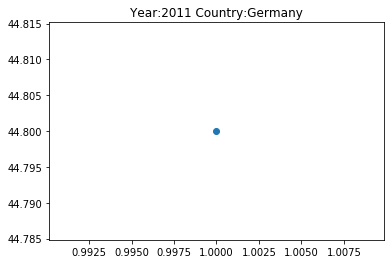

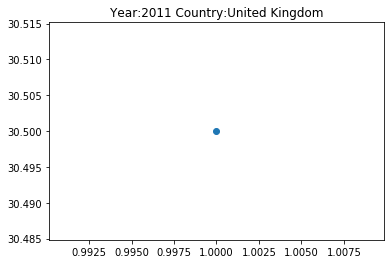

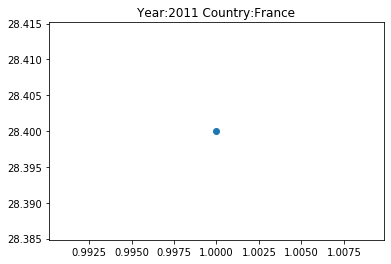

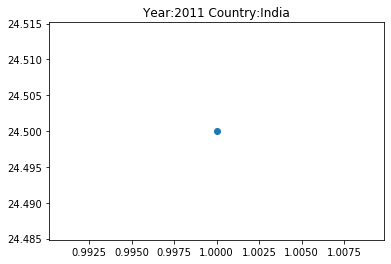

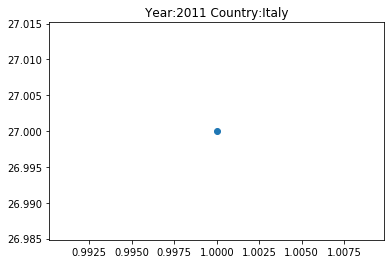

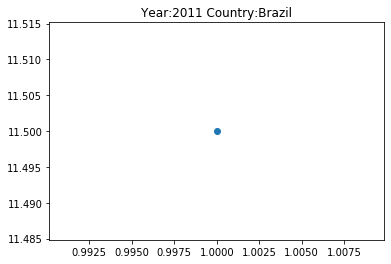

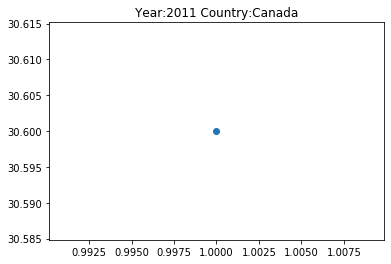

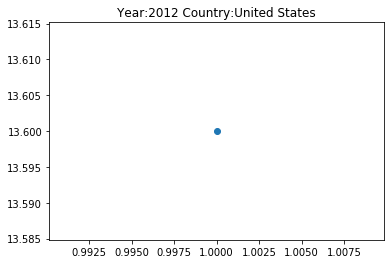

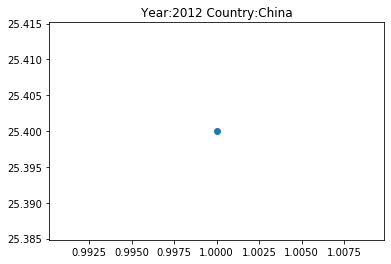

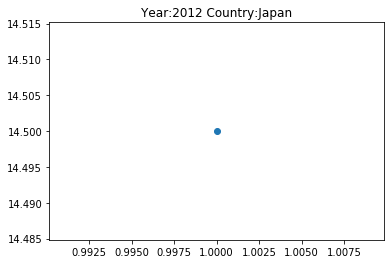

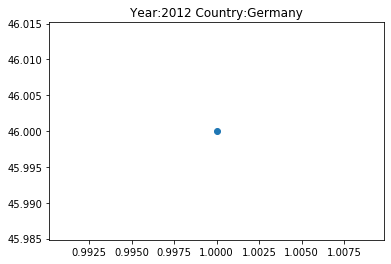

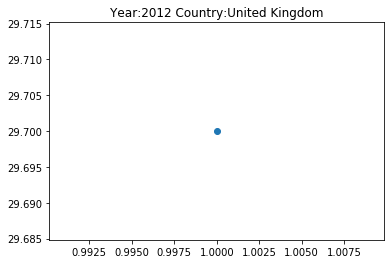

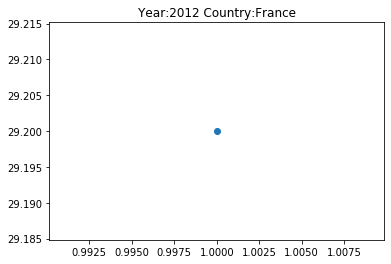

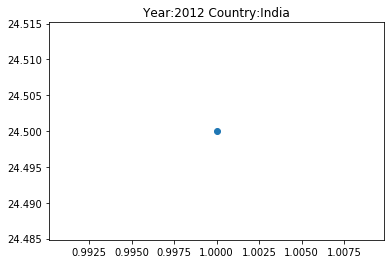

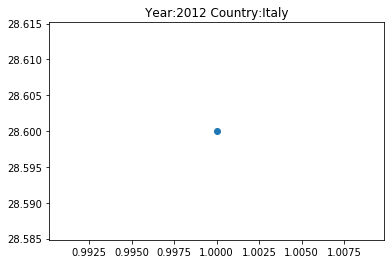

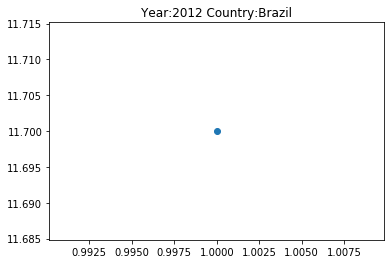

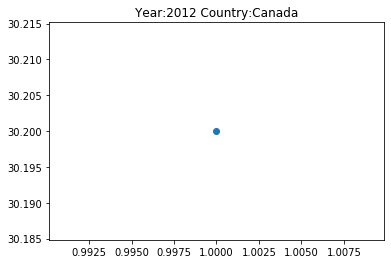

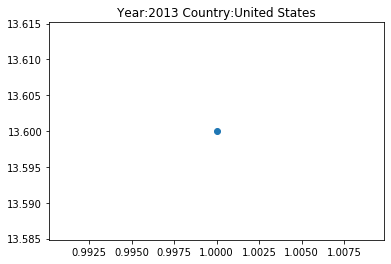

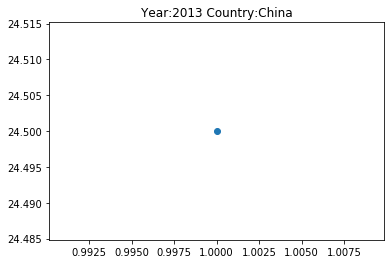

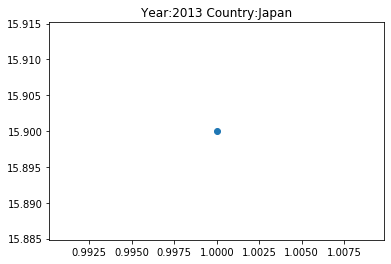

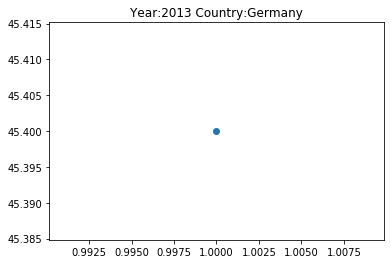

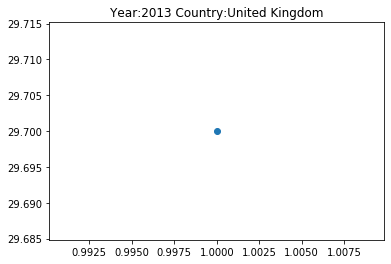

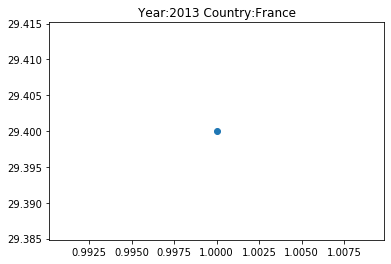

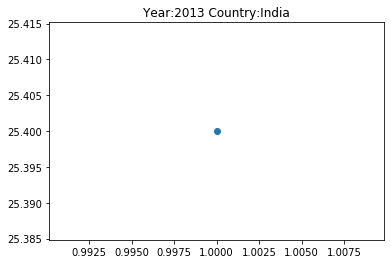

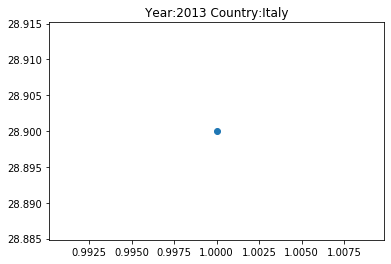

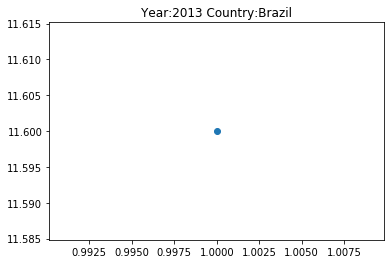

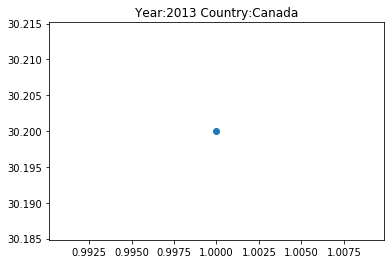

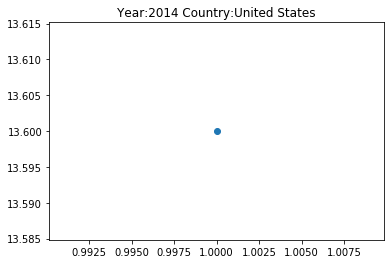

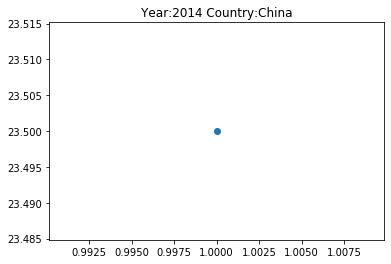

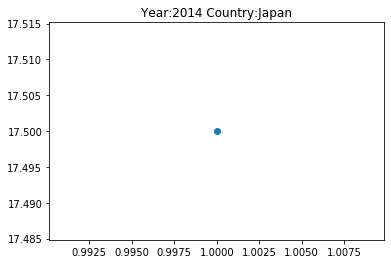

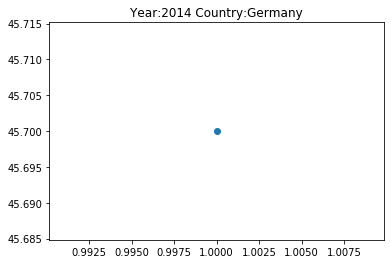

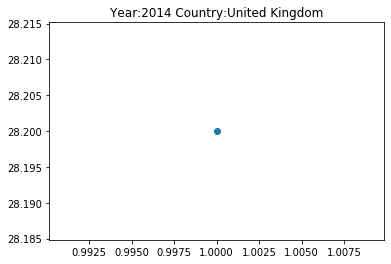

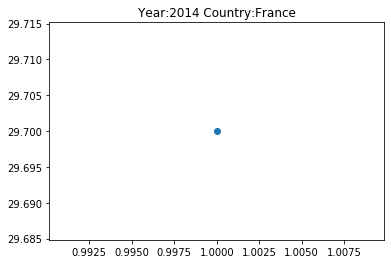

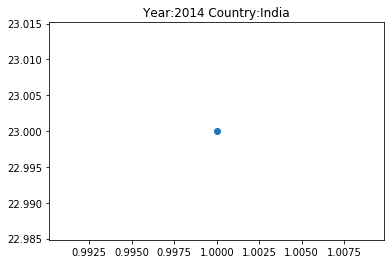

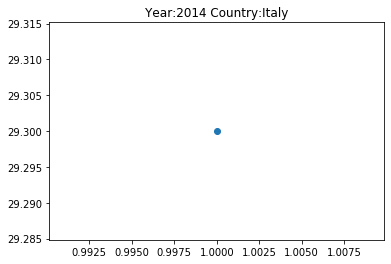

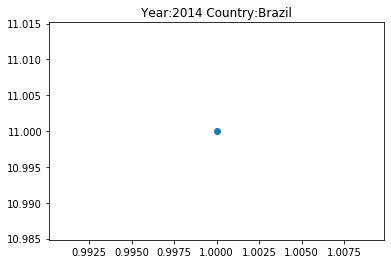

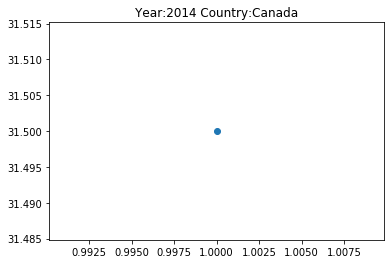

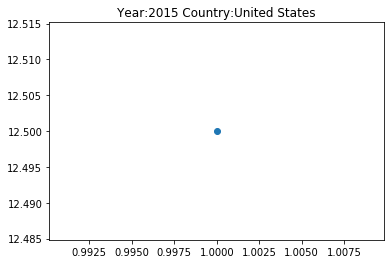

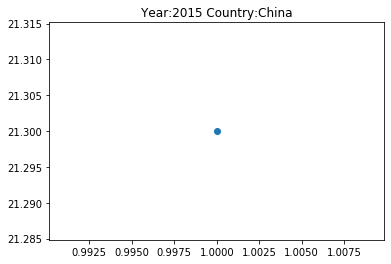

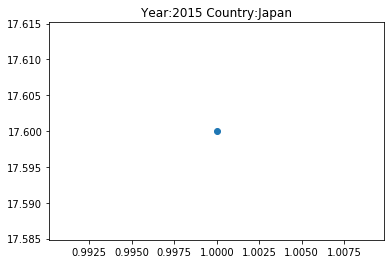

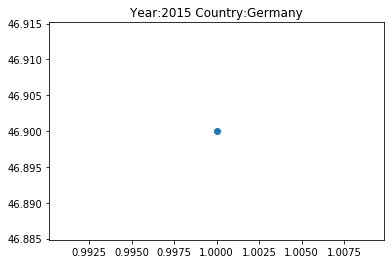

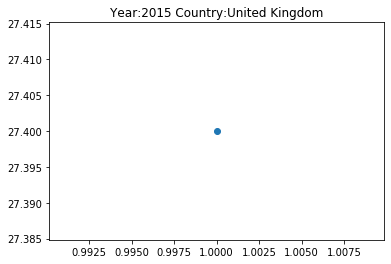

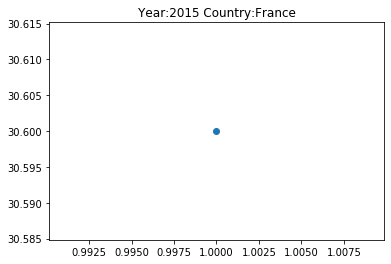

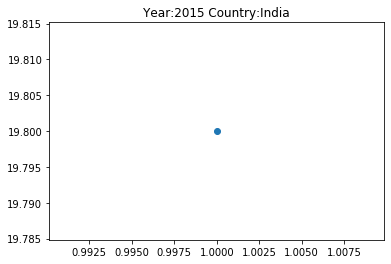

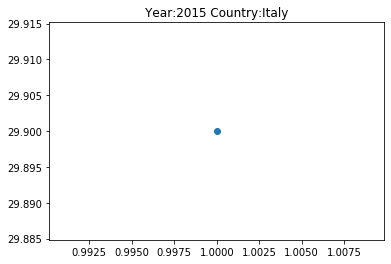

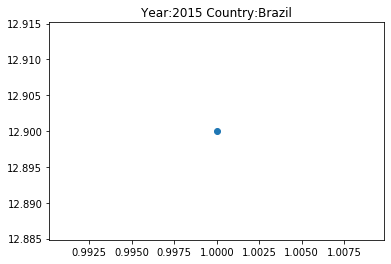

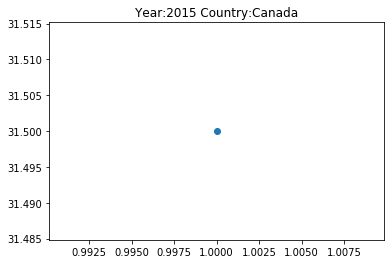

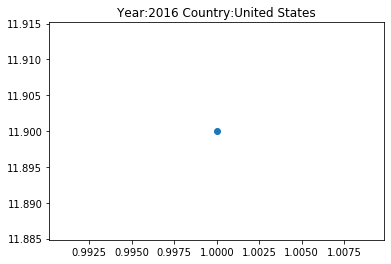

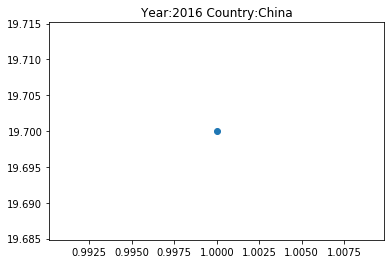

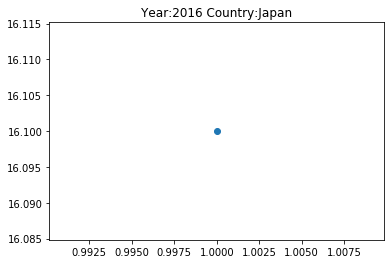

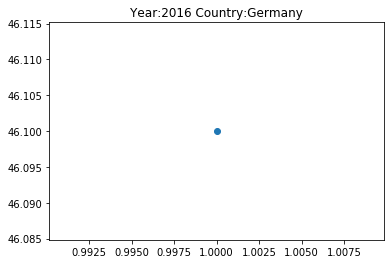

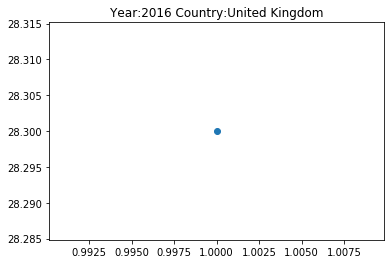

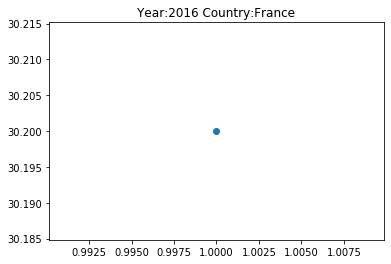

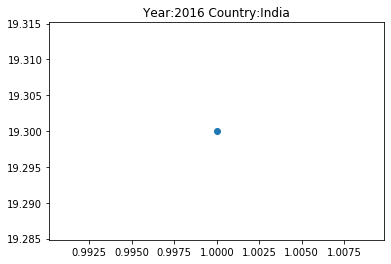

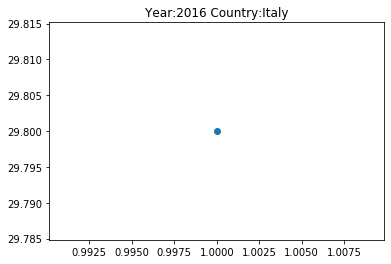

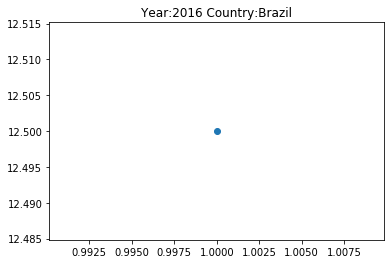

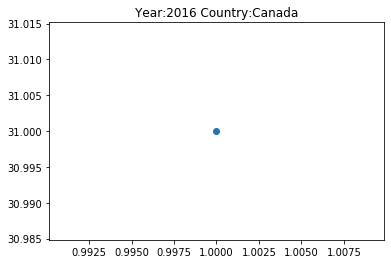

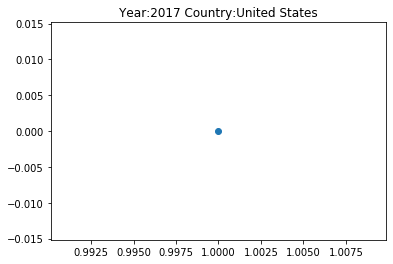

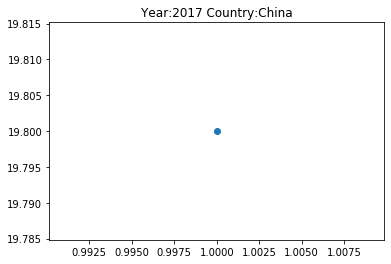

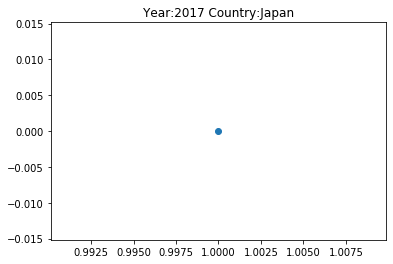

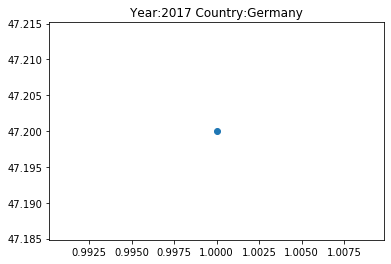

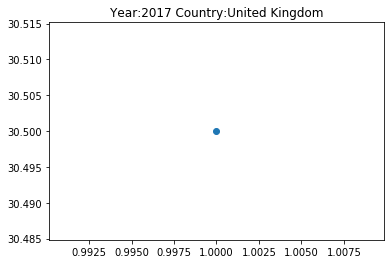

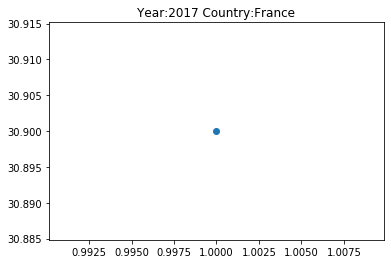

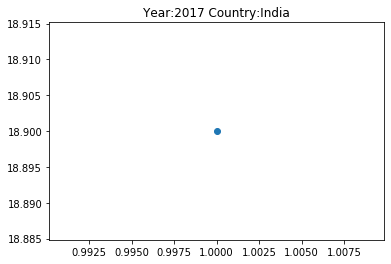

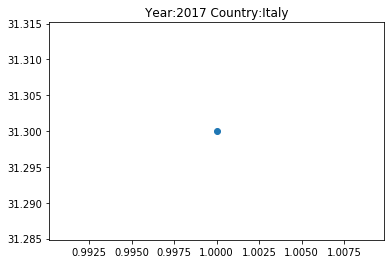

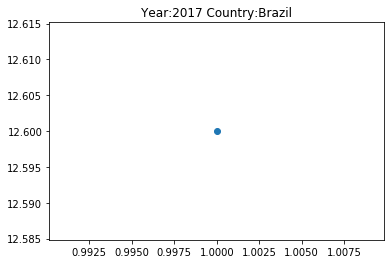

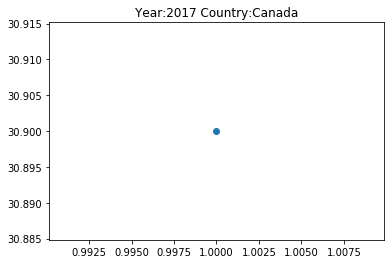

In [19]:
import matplotlib.pyplot as plt
for i in range(0,len(years)):
    for j in range(0,len(top10)):
        plt.scatter([1],GDP_TVSF.iloc[i][j])
        plt.title('Year:'+str(years[i])+' Country:'+top10[j])
        plt.show()
        print()

#### 1.4 Time Varying space Varying from 2000-2017

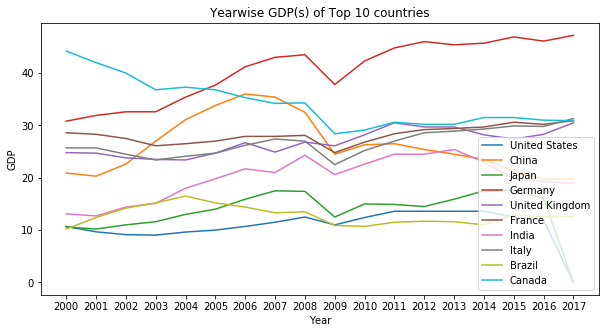

In [20]:
selcountries=df1.loc[2000:2017,top10]

c=[]
for country in top10:
    countrydata=selcountries[country]
    c.append(countrydata)
TVSV=pd.concat(c)

plt.figure(figsize=(10,5))
plt.plot(selcountries)
plt.xticks(range(2000,2018,1))
plt.title('Yearwise GDP(s) of Top 10 countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(top10)
plt.show()